# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.233018e+01     1.472269e+01
 * time: 0.004828929901123047
     1     6.151367e+01     9.550227e+00
 * time: 0.014991998672485352
     2     5.644753e+01     1.111571e+01
 * time: 0.038285017013549805
     3     3.927923e+01     9.420136e+00
 * time: 0.0707559585571289
     4     2.812237e+01     8.566713e+00
 * time: 0.1014108657836914
     5     1.822386e+01     4.814070e+00
 * time: 0.128173828125
     6     1.184925e+01     3.642186e+00
 * time: 0.15129780769348145
     7     8.982196e+00     2.957672e+00
 * time: 0.17181181907653809
     8     7.551537e+00     2.140764e+00
 * time: 0.1983020305633545
     9     7.019576e+00     1.361184e+00
 * time: 0.33496880531311035
    10     6.792040e+00     1.376951e+00
 * time: 0.3578789234161377
    11     6.444603e+00     1.257501e+00
 * time: 0.37862086296081543
    12     6.221222e+00     1.934368e+00
 * time: 0.40042781829833984
    13     6.052501e+00     1.300797e+00
 * time: 0.423

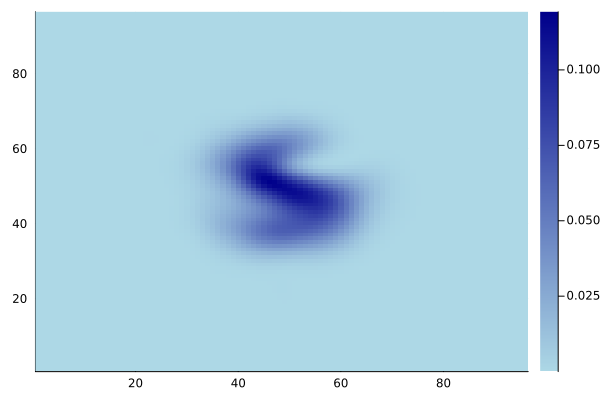

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)